# Introduction

*This introduction to classification is based on {cite:t}`Vanderplas2016` and a code tutorial from Alex Staravoita's app [tinkerstellar](https://tinkerstellar.com/).*

## Data

In this tutorial, we use the famous [iris flower](https://en.wikipedia.org/wiki/Iris_flower_data_set) data set. 

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
n_samples, n_features = iris.data.shape

print((n_samples, n_features))

(150, 4)


In [4]:
print(iris.data[0])

[5.1 3.5 1.4 0.2]


In [5]:
print(iris.target.shape)

(150,)


In [6]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


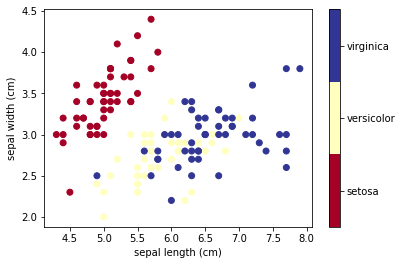

In [7]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
            
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

Every algorithm is exposed in scikit-learn via an estimator object. For instance a linear regression is implemented as so:

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)

All the parameters of an estimator can be set when it is instantiated, and have suitable default values. You can check a specific value, or print values of all currently set estimator parameters.

In [25]:
print('Normalize value: ' + str(model.normalize))
print(model)

Normalize value: True
LinearRegression(normalize=True)


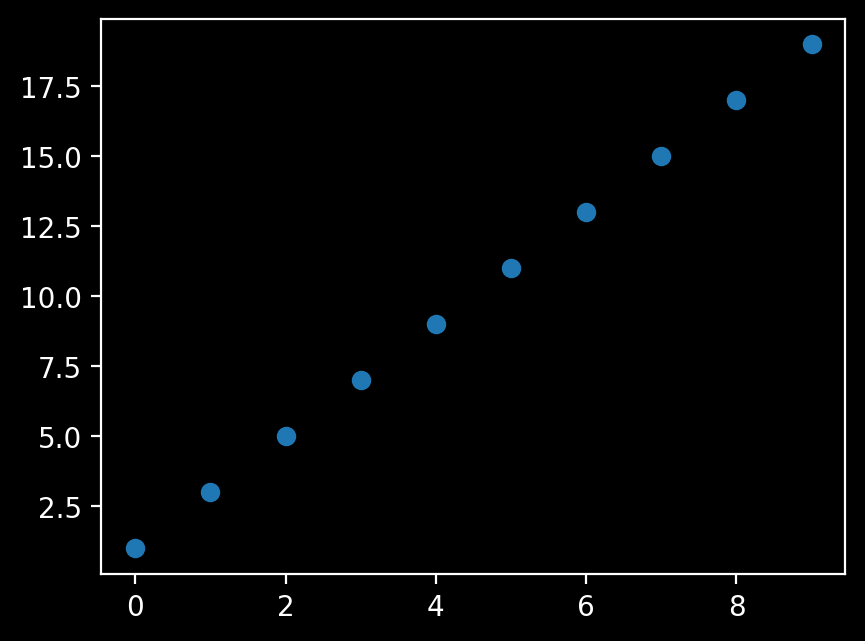

In [28]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(10)
y = 2 * x + 1
plt.plot(x, y, 'o')
plt.show()

Now we will prepare the data for sklearn, so that the input data is in a 2D array (samples == 10 x features == 1), and fit the model on our data:

In [29]:
X = x[:, np.newaxis]
model.fit(X, y)

LinearRegression(normalize=True)

We can now check the estimated parameters — they are all attributes of the estimator object ending with an underscore:

In [30]:
# Underscore at the end indicates a fit parameter
print(model.coef_)
print(model.intercept_)

[2.]
0.9999999999999964


In supervised learning, we have a dataset consisting of both features and labels. The task is to construct an estimator which is able to predict the label of an object given the set of features. A relatively simple example is predicting the species of iris given a set of measurements of its flower. This is a relatively simple task. Some more complicated examples are:
given a multicolor image of an object through a telescope, determine whether that object is a star, a quasar, or a galaxy.
given a photograph of a person, identify the person in the photo.
given a list of movies a person has watched and their personal rating of the movie, recommend a list of movies they would like (So-called recommender systems: a famous example is the Netflix Prize).
What these tasks have in common is that there is one or more unknown quantities associated with the object which needs to be determined from other observed quantities.
Supervised learning is further broken down into two categories, classification and regression. In classification, the label is discrete, while in regression, the label is continuous. For example, in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a classification problem: the label is from three distinct categories. On the other hand, we might wish to estimate the age of an object based on such observations: this would be a regression problem, because the label (age) is a 

K-nearest neighbors (k-NN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.
Let's try it out on our iris classification problem. As before, we load the dataset, initialize the model object, and, finally, fit the model to the data:

In [31]:
from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
print(knn)

KNeighborsClassifier()


Now that we have a model 'trained' using our dataset, we can use the predict() method to get a prediction for an arbitrary data point. What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?

In [32]:
result = knn.predict([[3, 5, 4, 2],])
print(iris.target_names[result])

['versicolor']


You can also do probabilistic predictions, i.e. check individual probability of this data point belonging to each of the classes:

In [33]:
knn.predict_proba([[3, 5, 4, 2],])

array([[0. , 0.8, 0.2]])

Let's try and visualize k-NN predictions on a plot.
We will use a helper function plot_iris_knn() — you can find its implementation in the appendix chapter of this lab. Here is what is happening in that function:
We take a 'slice' of the original dataset, taking only the first two features. This is because we will drawing a 2D plot, where we can only visualize two features at a time.
Then we fit a new k-NN model to this slice, using only two features from the original data.
Next, we paint a 'map' of predicted classes: we fill the plot area using a mesh grid of colored regions, where each region's color is based on the class predicted by the model.
Finally, we put the data points from the original dataset on the plot as well (in bold).

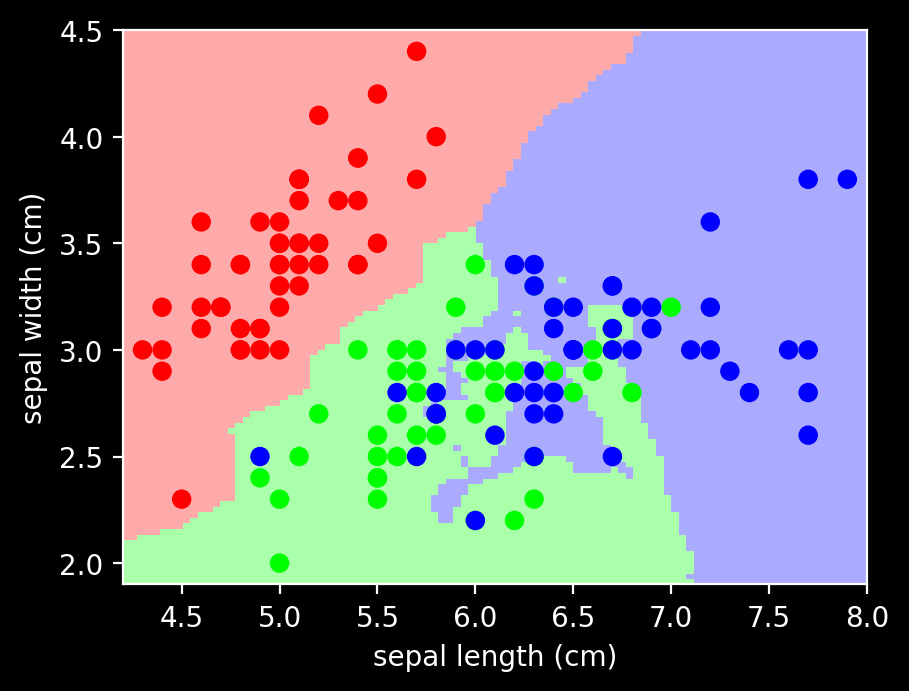

In [34]:
from sklearn import neighbors, datasets, linear_model
import pylab as pl
import numpy as np
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_iris_knn():
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # we only take the first two features.
    y = iris.target

    knn = neighbors.KNeighborsClassifier(n_neighbors=3)
    knn.fit(X, y)

    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    pl.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    pl.xlabel('sepal length (cm)')
    pl.ylabel('sepal width (cm)')
    pl.axis('tight')
    
plot_iris_knn()